In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
train_data_name = [str(i) + "_" + str(j) + ".png" for i in range(1,41) for j in range(1,10)]
test_data_name = [str(i) + "_" + "10" + ".png" for i in range(1,41)]

train_X = [cv2.imread("p1_data/" + name , cv2.IMREAD_GRAYSCALE) for name in train_data_name]
print("image shape : " , train_X[0].shape[:3])
train_X= np.array(train_X).reshape(360 , -1)
print(train_X.shape)
train_y = [i for i in range(1,41) for j in range(1,10)]
test_X = [cv2.imread("p1_data/" + name , cv2.IMREAD_GRAYSCALE) for name in test_data_name]
test_y = [i for i in range(1,41)]
test_X = np.array(test_X).reshape(40,-1)
print(test_X.shape)

image shape :  (56, 46)
(360, 2576)
(40, 2576)


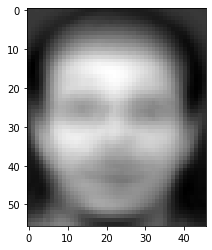

In [3]:
mean_vector = train_X.mean(axis = 0)
#print(mean_vector.shape)
plt.imshow(mean_vector.reshape(56,46), cmap='gray')
plt.show()

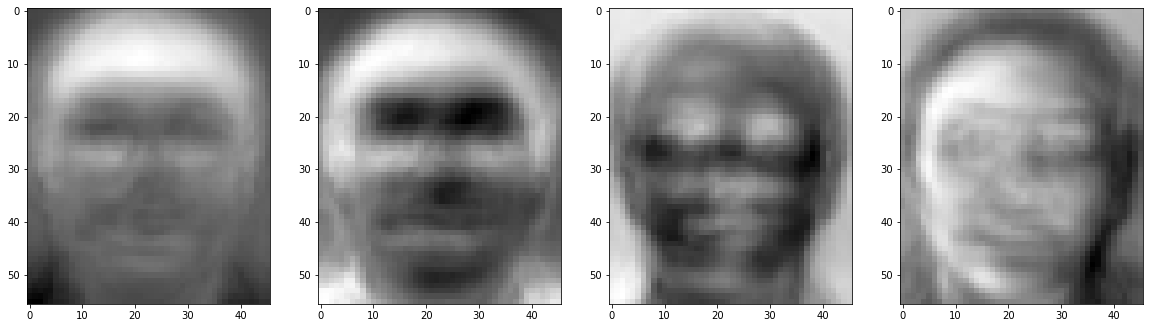

In [12]:
pca = PCA()
output = pca.fit(train_X - mean_vector)
#print(output.components_.shape)
#print(output.singular_values_)
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(output.components_[i].reshape(56,46), cmap='gray')
plt.show()

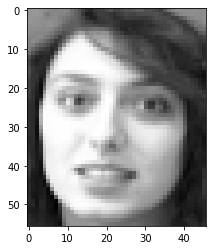

In [5]:
#Q2
input = cv2.imread("p1_data/" + "8_1.png" , cv2.IMREAD_GRAYSCALE)
input = input.reshape(1,-1)
plt.imshow(input.reshape(56,46), cmap='gray')
plt.show()

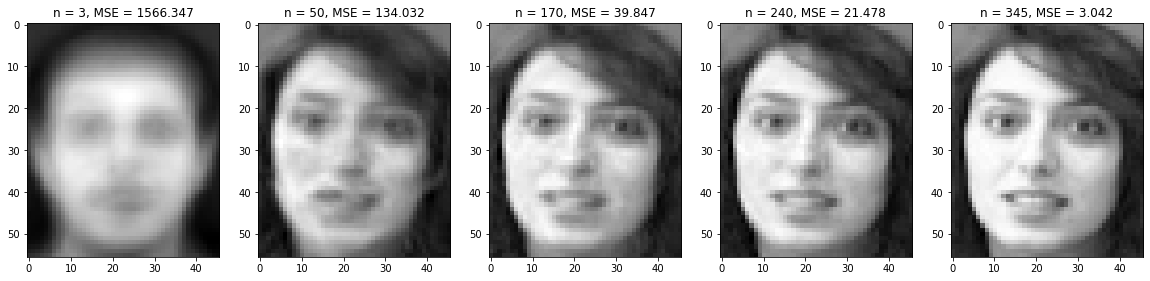

In [6]:
proj = pca.transform(input - mean_vector)
#print(proj.shape)
pos = [3, 50, 170, 240, 345]
plt.figure(figsize=(20,10))
for i,j in enumerate(pos):
    res = np.dot(proj[: , :j] , output.components_[:j ,:]) + mean_vector
    mse = np.mean((res - input)**2)
    plt.subplot(1,5,i+1)
    plt.title("n = "+str(j)+", MSE = "+str(round(mse,3)))
    plt.imshow(res.reshape(56,46), cmap = "gray")
plt.show()

In [7]:
# Q4
knn = KNeighborsClassifier()
param ={"n_neighbors" : [1 ,3 ,5]}
num_n = [3 ,50 , 170]
reduce_X = pca.transform(train_X - mean_vector)
clf = GridSearchCV(knn , param , cv = 3)
best_k = 0
best_n = 0
best_res = float("-inf")
for n in num_n:
    clf.fit(reduce_X[:,:n] , train_y)
    for i in range(3):
        res = clf.cv_results_['mean_test_score'][i]
        if res > best_res : 
            best_res , best_k , best_n = res , i+1 , n
    print(clf.cv_results_['mean_test_score'])
print("Best k =",best_k)
print("Best n =",best_n)



[0.65       0.61111111 0.56111111]
[0.96111111 0.9        0.84722222]
[0.95555556 0.88888889 0.82222222]
Best k = 1
Best n = 50


In [8]:
# Q5
knn = KNeighborsClassifier(best_k)
knn.fit(reduce_X[:,:best_n] , train_y)
test_X = pca.transform(test_X - mean_vector)
prediction = knn.predict(test_X[:,:best_n])
print("Acuracy : " ,accuracy_score(y_pred = prediction, y_true = test_y))

Acuracy :  0.925
